In [2]:
import torch
import norse.torch as norse
from scipy import signal
import numpy as np

In [3]:
import matplotlib.pyplot as plt

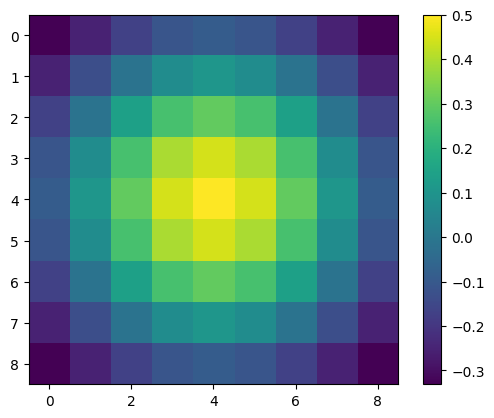

In [4]:
def create_kernel(kernel_size, *variances):
  kernels = []
  for var in variances:
    gauss = signal.gaussian(kernel_size, std=var)
    kernel = np.outer(gauss, gauss)
    kernel = kernel / kernel.max()
    kernel = (kernel - 0.5)
    kernels.append(torch.from_numpy(kernel).float())
  return torch.nn.Parameter(torch.stack(kernels).view(len(variances), 1, kernel_size, kernel_size))
plt.imshow(create_kernel(9, 3).detach().numpy().squeeze())
plt.colorbar()

In [5]:
d = torch.load("test.dat").cpu()[:,:160]

In [6]:
d.shape

torch.Size([101, 160, 160])

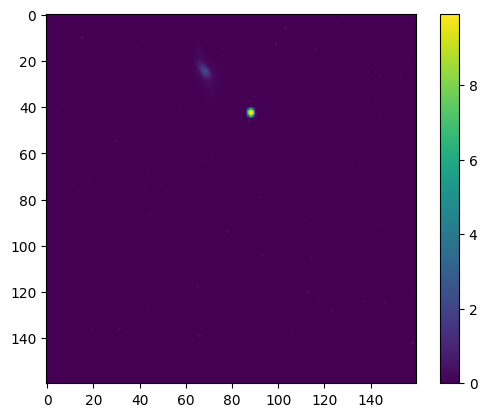

In [7]:
x = d.clone().mean(0)
# x[x > 1] = 0
# x[x > 2] = 0
plt.imshow(x.T)
plt.colorbar()

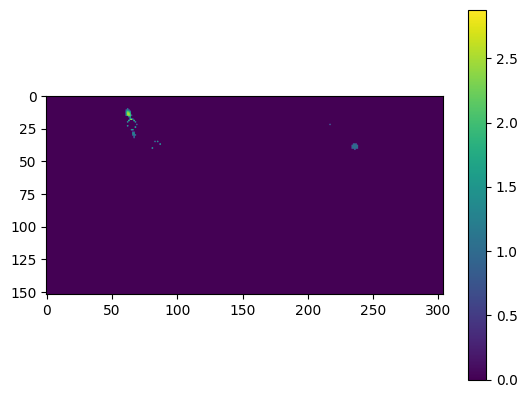

In [8]:
c = torch.nn.Sequential(
    torch.nn.Conv2d(1, 1, 9, bias=False),
    torch.nn.ReLU(),
)
c[0].weight = create_kernel(9, 3)
# c.bias = torch.nn.Parameter(torch.tensor([-10, 0.0]))
y = c(d[68].unsqueeze(0))

mirror = y.clone()
mirror[mirror > 3] = 0
mirror[mirror < 1] = 0

target = y.clone()
# target = torch.zeros_like(y)
target[target < 20] = 0
target[target > 20] = 1
out = torch.concat([mirror, target], dim=1).squeeze().detach().cpu()
plt.imshow(out.T)
plt.colorbar()

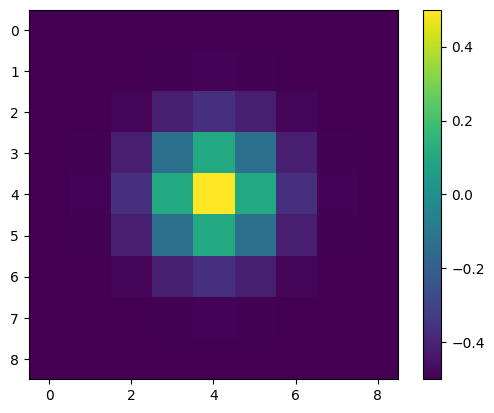

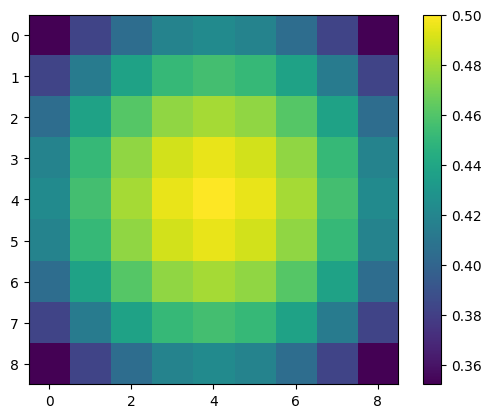

In [9]:
ks = create_kernel(9, 1, 10)
plt.imshow(ks[0, 0].detach().cpu())
plt.colorbar()
plt.show()
plt.imshow(ks[1, 0].detach().cpu())
plt.colorbar()

In [12]:
mirror.shape

torch.Size([1, 152, 152])